# KNN Implementation

In [ ]:
import math
def euclidean_dist(x,y):
  x1,x2=x
  y1,y2=y
  return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def knn(points,query,k):
  #points:-{{(1,2):A},{(1,1):B},.....}
  #query:- (3,2)
  #k=2/3/...

  #STEP1:- calc euclidean dist of the point from all the pts
  x,y=query
  dist={}
  for p in points:
    x1,y1=p
    dist[p]=euclidean_dist((x1,y1),(x,y))

  #STEP2:- fetch k nearest points
  sorted_dist=sorted(dist.items(),key=lambda x:x[1])
  nearest_points=sorted_dist[:k]

  #STEP3:- check which label is majority -> that label is assigned
  freq={}
  for pts in nearest_points:
    label=points[pts[0]]  #this gives us the label of the point
    if label not in freq:
      freq[label]=1
    else:
      freq[label]+=1
  #find majority
  max_freq=0
  max_freq_label=''
  for label,f in freq.items():
    if f>max_freq:
      max_freq=f
      max_freq_label=label
  return max_freq_label


points = {
    (1,2): 'A',
    (1,1): 'B',
    (2,2): 'A',
    (2,1): 'B'
}
query=(3,2)
k=2
print(knn(points,query,k))

B


# ADAM Optimization

In [ ]:
import numpy as np
def f(x):
    return x[0]**2 + x[1]**2

def grad(x):
    return np.array([2*x[0], 2*x[1]])




def adam_optimizer(f, grad, x0, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=50):
	# Your code here
	x=x0.astype(np.float64)
	#m and v are vectors
	m=np.zeros(x.shape)
	v=np.zeros(x.shape)
	for t in range (1,num_iterations+1):
		gradx=grad(x)
		m=beta1*m + (1-beta1)*gradx
		v=beta2*v + (1-beta2)*(gradx)**2

		m_hat=m/(1-beta1**t)
		v_hat=v/(1-beta2**t)

		x=x-learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
	return x

x0 = np.array([1.0, 1.0])
x_opt = adam_optimizer(f, grad, x0)

print("Optimized parameters:", x_opt)

Optimized parameters: [4.08374549e-14 4.08374549e-14]


# RIDGE REGRESSION for 2D

In [6]:
import numpy as np
class MyRidgeRegression:
  def __init__(self,alpha=0.1):
    self.alpha=alpha
    self.w=None
    self.b=None
  def fit(self,X_train,Y_train):
    num_sample=X_train.shape[0]
    num=0
    denom=0
    for i in range(num_sample):
      num+=(Y_train[i]-Y_train.mean())*(X_train[i]-X_train.mean())
      denom+=(X_train[i]-X_train.mean())**2
    self.w=num/(denom+self.alpha)
    self.b=Y_train.mean()-(self.w*X_train.mean())
    print(self.w," , ",self.b)

  def predict(self,X_test):
    return self.w*X_test+self.b

In [9]:
X_train = np.array([1, 2, 3, 4, 5], dtype=float)
Y_train = np.array([2, 4.1, 6.0, 8.2, 9.9], dtype=float)
model=MyRidgeRegression()
model1=MyRidgeRegression(alpha=0)
model.fit(X_train,Y_train)
model1.fit(X_train,Y_train)
X_test = np.array([3, 4, 5, 6, 7], dtype=float)
Y_pred = model.predict(X_test)
Y_pred1 = model1.predict(X_test)
print("USING REGULARIZATION:- ",Y_pred)
print("WITHOUT REGULARIZATION:- ",Y_pred1)

1.9702970297029703  ,  0.12910891089108834
1.9899999999999998  ,  0.07000000000000028
USING REGULARIZATION:-  [ 6.04        8.01029703  9.98059406 11.95089109 13.92118812]
WITHOUT REGULARIZATION:-  [ 6.04  8.03 10.02 12.01 14.  ]


## K-MEANS CLUSTERING

In [23]:
import random
import numpy as np
class KMeans:
    def __init__(self,num_clusters=3,max_iterations=100):
        self.num_clusters=num_clusters
        self.max_iterations=max_iterations
        self.centroids=None 
    def fit(self,X):
        #select random centroids  
        random_indices = random.sample(range(len(X)),self.num_clusters)
        self.centroids = X[random_indices]
        print("Initial Centroids: ",self.centroids)
        #loop
        cluster_grp= self.assign_clusters(X)
        
        for i in range(self.max_iterations):
            #1. Assign clusters
            cluster_grp= self.assign_clusters(X)
            #2. Move centroids
            old_centroids=self.centroids
            new_centroids=self.move_centroids(X,cluster_grp)
            self.centroids=new_centroids
            #3. Check for convergence
            if(old_centroids==new_centroids).all():
                print(f"Converged at iteration {i}")
                break
        
        return cluster_grp

    def move_centroids(self,X,cluster_grp):
        #for each cluster-> find mean of all points assigned to that cluster
        new_centroids=[]
        #maybe anyone cluster didnt get any points assigned to it
        #so use cluster_type
        cluster_type=np.unique(cluster_grp)
        for cluster in cluster_type:
            points=X[cluster_grp==cluster]
            new_centroid=np.mean(points,axis=0) #column wise mean
            new_centroids.append(new_centroid)
        return np.array(new_centroids)

    def euclidean_dist(self,x,y):
        return np.sqrt(np.dot(x-y,x-y))
    def assign_clusters(self,X):
        cluster_grp=[]
        distances=[]
        for point in X:
            for centroid in self.centroids:
                dist=self.euclidean_dist(point,centroid) 
                distances.append(dist)
            min_dist=min(distances)     #out of the k centroids, find the min dist of the point from a centroid
            #this min dist centroid is assigned to the point
            cluster_index=distances.index(min_dist)
            cluster_grp.append(cluster_index)
            distances=[]


        return np.array(cluster_grp)
        #this will be a list of cluster indices assigned to each data point]
        #eg:- [0,1,2,0,1,2,2,0....]


Initial Centroids:  [[1.86568152 5.29257911]
 [3.96078194 6.75837035]
 [3.60151581 6.00365949]]
Converged at iteration 4
[0 2 0 2 1 0 0 2 0 1 1 1 0 1 1 1 2 2 2 0 2 2 0 1 1 0 1 0 2 1 1 2 0 0 0 0 1
 2 1 1 0 0 2 2 2 2 1 0 1 1 0 2 2 2 2 2 2 2 2 0 2 0 0 2 1 0 1 2 0 0 1 0 0 2
 2 2 0 2 1 2 1 1 1 0 1 0 0 1 2 0 1 2 0 1 1 0 1 0 0 1]


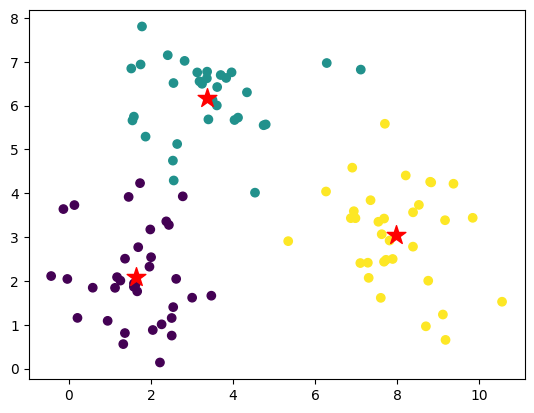

In [26]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

centriods = [[2, 2], [8, 3], [3, 6]]
cluster_std=[1,1,1]
X, label_true = make_blobs(n_samples=100, centers=centriods, n_features=2,
                  cluster_std=cluster_std, random_state=2)
#this creates a synthetic dataset with 3 clusters

kmeansmodel=KMeans(num_clusters=3)
label_pred=kmeansmodel.fit(X)
print(label_pred)
plt.scatter(X[:,0],X[:,1],c=label_pred)
plt.scatter(kmeansmodel.centroids[:,0],kmeansmodel.centroids[:,1],c='red',marker='*',s=200)
plt.show()
